In [ ]:
import numpy as np
import plotly.graph_objects as go

from scipy.optimize import curve_fit, differential_evolution, dual_annealing, minimize

In [ ]:
def f(x):
    return 1 / (x ** 2 - 3 * x + 2)

In [ ]:
def generate_noisy_data(x):
    noise = np.random.normal(0, 1, 1001)
    y_noised = np.zeros(1001)
    condition_1 = y < -100
    condition_2 = (-100 <= y) & (y <= 100)
    condition_3 = y > 100
    y_noised = np.where(~condition_1, y_noised, -100 + noise)
    y_noised = np.where(~condition_2, y_noised, y + noise)
    y_noised = np.where(~condition_3, y_noised, 100 + noise)
    return y_noised

In [ ]:
x = np.linspace(0, 3, 1001)
y = f(x)
y_noised = generate_noisy_data(y)

initial_guess = np.array([1, 1, 1, 1])
epsilon = 1e-3

In [ ]:
def rational_approximant(x, a, b, c, d):
    return (a * x + b) / (x ** 2 + c * x + d)

In [ ]:
def cost_function(parameters, x, y):
    return np.sum((rational_approximant(x,
                                        parameters[0],
                                        parameters[1],
                                        parameters[2],
                                        parameters[3]) - y) ** 2)

Nelder-Mead

In [ ]:
nelder_mead = minimize(cost_function, x0=initial_guess, method='Nelder-Mead', tol=epsilon, args=(x, y_noised))
print(f'estimated parameters: {nelder_mead["x"]}\n'
      f'iterations: {nelder_mead["nit"]}\n'
      f'function evaluations: {nelder_mead["nfev"]}')

estimated parameters: [-1.00252718  1.00303474 -2.00095852  1.00097473]
iterations: 302
function evaluations: 508


Levenberg-Marquardt algorithm

In [ ]:
levenberg_marquardt, _ = curve_fit(rational_approximant, x, y_noised, p0=initial_guess, method='lm')
print(f'estimated parameters: {levenberg_marquardt}')

estimated parameters: [-1.00643023  1.00691833 -2.00087504  1.00089135]


Simulated Annealing

In [ ]:
simulated_annealing = dual_annealing(cost_function, bounds=[(-3, 3)] * 4, args=(x, y_noised))
print(f'estimated parameters: {simulated_annealing["x"]}\n'
      f'iterations: {simulated_annealing["nit"]}\n'
      f'function evaluations: {simulated_annealing["nfev"]}')

estimated parameters: [-1.00231435  1.00282214 -2.00095942  1.00097562]
iterations: 1000
function evaluations: 8691


Differential Evolution

In [ ]:
differential_ev = differential_evolution(cost_function, bounds=[(-3, 3)] * 4, args=(x, y_noised))
print(f'estimated parameters: {differential_ev["x"]}\n'
      f'iterations: {differential_ev["nit"]}\n'
      f'function evaluations: {differential_ev["nfev"]}')

estimated parameters: [-0.74032937 -0.06282272 -2.69808327  2.12805167]
iterations: 4
function evaluations: 1335


In [ ]:
figure = go.Figure()
figure.add_trace(go.Scatter(x=x, y=y_noised,
                            mode='markers',
                            name='noised data'))
figure.add_trace(go.Scatter(x=x, y=rational_approximant(x, *nelder_mead['x']),
                            mode='lines',
                            name='nelder-mead approximation'))
figure.add_trace(go.Scatter(x=x, y=rational_approximant(x, *levenberg_marquardt),
                            mode='lines',
                            name='levenberg-marquardt approximation'))
figure.add_trace(go.Scatter(x=x, y=rational_approximant(x, *simulated_annealing['x']),
                            mode='lines',
                            name='simulated annealing approximation',
                            line_color='#8DE89F'))
figure.add_trace(go.Scatter(x=x, y=rational_approximant(x, *differential_ev['x']),
                            mode='lines',
                            name='differential evolution approximation'))
figure.update_layout(title='Rational Approximation', font_size=10)

In [ ]:
написать, что разница заметна лишь при большом приближении

 Travelling Salesman Problem

In [ ]:
!git clone https://github.com/chncyhn/simulated-annealing-tsp.git

In [ ]:
import sys
sys.path.append('/content/simulated-annealing-tsp')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import ast
from anneal import SimAnneal

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/University/Algorithms/coordinates.txt'
with open(path, 'r') as file:
    coordinates = file.readlines()
coordinates = [ast.literal_eval(coordinates_.strip(' \n').replace('      ', ',')) for coordinates_ in coordinates]

In [ ]:
sa = SimAnneal(coordinates, stopping_iter=5000)

In [ ]:
sa.anneal()

Starting annealing.
Best fitness obtained:  14316.273993312316
Improvement over greedy heuristic:  12.78%


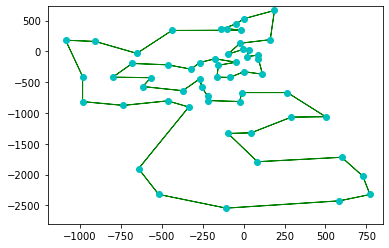

In [ ]:
sa.visualize_routes()

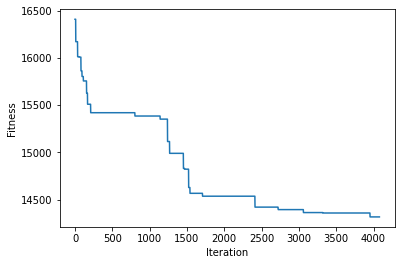

In [ ]:
sa.plot_learning()